In [1]:
from pathlib import Path
import itertools

import numpy as np
# https://matplotlib.org/gallery/lines_bars_and_markers/curve_error_band.html#sphx-glr-gallery-lines-bars-and-markers-curve-error-band-py
from scipy.interpolate import splprep, splev


import matplotlib.ticker as mticker
import matplotlib.patches as mpatches
import matplotlib.collections as mcollections
import matplotlib.colors as mcolors
import matplotlib.path as mpath
import matplotlib.pyplot as plt


import themepy
spath = Path("../../../draft/figures/math/")

theme = themepy.Theme('paper')

%matplotlib inline

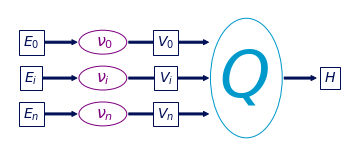

In [271]:
fig, ax = plt.subplots()

facecolor='white'
elabs = [r"$E_0$", r"$E_i$", r"$E_n$"][::-1]
nlabs = [r"$\nu_0$", r"$\nu_i$", r"$\nu_n$"][::-1]
vlabs = [r"$V_0$", r"$V_i$", r"$V_n$"][::-1]
# mutation_scale
for i, el, nl, vl in zip([0, 3, 6], elabs, nlabs, vlabs):
    #nu
    ax.text(6.45,i+.75, nl, fontsize=16, color='C4')
    p = mpatches.Ellipse((7, i+1), width=4, height=2, facecolor=facecolor, edgecolor='C4')
    ax.add_patch(p)

    #V block
    ax.text(12.25, i+1, vl, fontsize=14, color='C8', ha="center", va="center", 
            bbox=dict(boxstyle="square",  ec='C8', fc=facecolor))
    p1 = mpatches.FancyArrowPatch((9,i+1),(16, i+1), color='C8', mutation_scale=10)
    ax.add_patch(p1)
    #E block
    ax.text(1, i+1, el, fontsize=14, color='C8', ha="center", va="center",
            bbox=dict(boxstyle="square",  ec='C8', fc=facecolor))
    p3 = mpatches.FancyArrowPatch((0,i+1),(5, i+1), color='C8', mutation_scale=10)
    ax.add_patch(p3)

e = mpatches.Ellipse((19,4), width=6, height=10, facecolor=facecolor, edgecolor='#0099CC')
ax.add_patch(e)
ax.text(16.75,2.5,r'$Q$', fontsize=64, color='#0099CC')
p4 = mpatches.FancyArrowPatch((22, 4),(25,4), color='C8', mutation_scale=10)
ax.add_patch(p4)
ax.text(26,4, "$H$", fontsize=14, color='C8', ha="center", va="center",
        bbox=dict(boxstyle="square",  ec='C8', fc=facecolor))
ax.set(xlim=(-1,27), ylim=(-2,10), aspect='equal')
ax.axis('off')
fig.savefig(spath/"path_of_q.png", bbox_inches='tight', facecolor=facecolor)

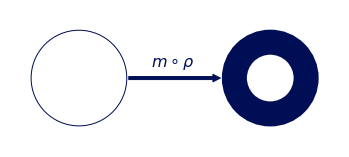

In [272]:
fig, ax = plt.subplots()

c1 = mpatches.Circle((-2,0), radius=2, facecolor='white', edgecolor="C0")
ax.add_patch(c1)
c2 = mpatches.Circle((6,0), radius=1.5, facecolor='white', edgecolor="C0", linewidth=25)
ax.add_patch(c2)
p4 = mpatches.FancyArrowPatch((0,0), (4,0), color='C8', mutation_scale=15)
ax.add_patch(p4)
ax.text(1,.5, r'$m\circ\rho$', color='C8', fontsize=16)
ax.set(xlim=(-5,9), ylim=(-3,3), aspect='equal')
ax.axis('off')
fig.savefig(spath/"diff_type_q.png", bbox_inches='tight', facecolor='white' )

{'confused': '😕', 'woozy': '🥴', 'shruggy': '🙃'}
{'shruggy': '🙃', 'confused': '😕', 'woozy': '🥴'}
{'woozy': '🥴', 'shruggy': '🙃', 'confused': '😕'}


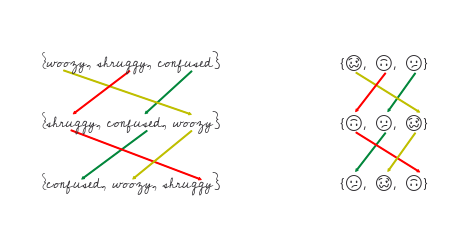

In [537]:
import random


idx1 = [0,1,2]
idx2= [2,0,1]
idx3 = [1,2, 0]
nu1 = {'confused':'😕', 'woozy':'🥴', 'shruggy':'🙃'}
nu2 = {keys[i]:nu[keys[i]] for i in idx2}
nu3 = {keys[i]:nu[keys[i]] for i in idx3}

c1, c2, c3 = 'C2', 'C5', 'C11'
colork = {'confused':c1, 'woozy':c2, 'shruggy':c3}
colorv = {'😕':c1, '🥴':c2, '🙃':c3}



fig, ax = plt.subplots(figsize=(8,4))

for i, nu in enumerate([nu1, nu2, nu3]):
    print(nu)
    ax.text(.2, i/3, f"{{{', '.join(nu.keys())}}}", fontsize=14)
    ax.text(6.2, i/3, f"{{{',  '.join(nu.values())}}}", fontsize=14, fontfamily='Segoe UI Emoji')


#first shuffle
p11 = mpatches.FancyArrowPatch((3.25,.65), (2.25,.4), mutation_scale=5, color=colork['confused'])
ax.add_patch(p11) #confused
p12 =  mpatches.FancyArrowPatch((0.6,.65), (3.25,.4), mutation_scale=5, color=colork['woozy'])
ax.add_patch(p12)#woozy
p13 =  mpatches.FancyArrowPatch((2.0,.65), (0.8,.4), mutation_scale=5, color=colork['shruggy'])
ax.add_patch(p13) #shruggy

e11 =  mpatches.FancyArrowPatch((7.75,.64), (7.15,.41), mutation_scale=5, color=colork['confused'])
ax.add_patch(e11) #confused
e12 = mpatches.FancyArrowPatch((6.5,.64), (7.85,.41), mutation_scale=5, color=colork['woozy'])
ax.add_patch(e12) #woozy
e13 =  mpatches.FancyArrowPatch((7.15,.64), (6.5,.41), mutation_scale=5, color=colork['shruggy'])
ax.add_patch(e13) #shruggy


#second shuffle
p21 = mpatches.FancyArrowPatch( (2.35,.32), (0.97,0.04) , mutation_scale=5, color=colork['confused'])
ax.add_patch(p21) #confused
p22 =  mpatches.FancyArrowPatch((0.75,.32), (3.45,0.04), mutation_scale=5, color=colork['shruggy'])
ax.add_patch(p22)#woozy
p23 =  mpatches.FancyArrowPatch((3.25,.32), (2,0.04), mutation_scale=5, color=colork['woozy'])
ax.add_patch(p23) #shruggy

e21 = mpatches.FancyArrowPatch( (7.15,.31), (6.5,0.08) , mutation_scale=5, color=colork['confused'])
ax.add_patch(e21) #confused
e22 =  mpatches.FancyArrowPatch((6.5,.31), (7.85,0.08), mutation_scale=5, color=colork['shruggy'])
ax.add_patch(e22)#woozy
e23 =  mpatches.FancyArrowPatch((7.75,.31), (7.15,0.08), mutation_scale=5, color=colork['woozy'])
ax.add_patch(e23) #shruggy


ax.set(xlim=(-0.5,8.5), ylim=(-0.2,1))
ax.axis('off')
fig.savefig(spath/"equivariance_nu.png", bbox_inches='tight', facecolor='white' )